[View in Colaboratory](https://colab.research.google.com/github/lvwuyunlifan/Colaboratory/blob/master/chapter2.ipynb)

##配置环境

上传需要用到的图片dave.png、opencv.png、timg.jpg

In [27]:
from google.colab import files
import os 
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
# print(os.getcwd())

Saving dave.png to dave.png
Saving opencv.png to opencv.png
Saving timg.jpg to timg.jpg
User uploaded file "dave.png" with length 371604 bytes
User uploaded file "opencv.png" with length 135523 bytes
User uploaded file "timg.jpg" with length 65983 bytes


In [28]:
! ls /content

datalab  dave.png  opencv.png  timg.jpg


##fft.py

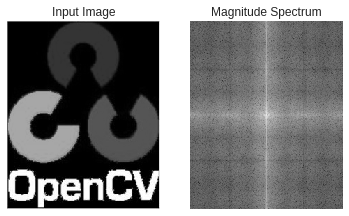

In [21]:
%matplotlib inline

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


img = cv.imread('./opencv.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

##f1.py

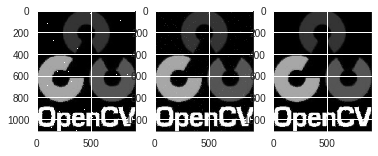

In [22]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('./opencv.png',0) #直接读为灰度图像
for i in range(2000): #添加点噪声
    temp_x = np.random.randint(0,img.shape[0])
    temp_y = np.random.randint(0,img.shape[1])
    img[temp_x][temp_y] = 255

blur_1 = cv2.GaussianBlur(img,(5,5),0)

blur_2 = cv2.medianBlur(img,5)

plt.subplot(1,3,1),plt.imshow(img,'gray')#默认彩色，另一种彩色bgr
plt.subplot(1,3,2),plt.imshow(blur_1,'gray')
plt.subplot(1,3,3),plt.imshow(blur_2,'gray')
plt.show()

##f2.py

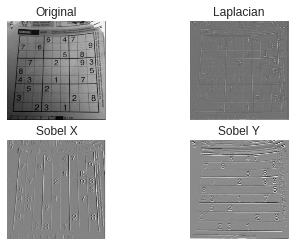

In [23]:
%matplotlib inline

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


img = cv.imread('./dave.png',0)
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

##cache.py

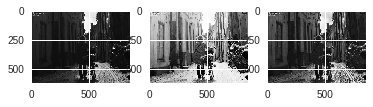

In [25]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./timg.jpg',0) #直接读为灰度图像
res = cv2.equalizeHist(img)

clahe = cv2.createCLAHE(clipLimit=2,tileGridSize=(10,10))
cl1 = clahe.apply(img)

plt.subplot(131),plt.imshow(img,'gray')
plt.subplot(132),plt.imshow(res,'gray')
plt.subplot(133),plt.imshow(cl1,'gray')

plt.show()

##filter_1.ipynb

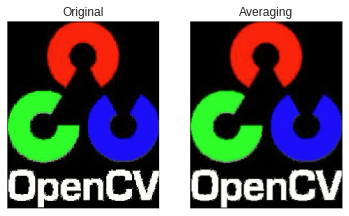

In [29]:
%matplotlib inline

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('./opencv.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()